In [1]:
DATA_PATH =r"C:\Users\Mohamed Gad\OneDrive\Desktop\All About Data Science\Data Sciience Projects\End to End - Ai-Pro\V1\iti project\AI-Pro Project\data\processed\1_preprcoessed_df.pkl"

In [2]:
TECH_COLS = [ 'DatabaseWorkedWith', 'LanguageWorkedWith', 'MiscTechWorkedWith',  'WebframeWorkedWith']
TECH_NEXT_COLS = ['DatabaseDesireNextYear', 'LanguageDesireNextYear', 'MiscTechDesireNextYear', 'WebframeDesireNextYear',]
ROLE_COLS = ["DevType"]

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [4]:
df = pd.read_pickle(DATA_PATH)
df.head(2)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13.0,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",[ASP.NET Core],"[ASP.NET, ASP.NET Core]",Just as welcome now as I felt last year,50.0,36.0,27.0
1,2,I am a developer by profession,No,NaN,19.0,,NaN,NaN,United Kingdom,Pound sterling,...,,,,"Computer science, computer engineering, or sof...",[],[],Somewhat more welcome now than last year,NaN,7.0,4.0


In [5]:
encoded_dfs = {}
for col in TECH_COLS + ROLE_COLS :
    mlb = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(mlb.fit_transform(df[col]), columns = mlb.classes_, index=df[col].index)
    encoded_dfs[col] = encoded_df
# Merging 
ohe_df = pd.concat(encoded_dfs, axis=1)
# this is apperviations for this :
#x = pd.concat(encoded_dfs.values(), axis=1, keys=encoded_dfs.keys())


In [19]:
ohe_df = ohe_df.drop('', axis=1, level=1)


### Applying T-SNE For Easy Visualization

In [20]:
skills = ohe_df.drop('DevType', axis=1).copy()
std_skills = StandardScaler().fit_transform(skills)

C:\Users\Mohamed Gad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

C:\Users\Mohamed Gad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



In [21]:
tsne_projection = TSNE(n_components=2, 
                       perplexity=3,
                       learning_rate=0.01,
                       init='pca', 
                       method='barnes_hut', 
                       n_jobs=2, 
                       n_iter=10**10,
                       random_state=0).fit_transform(std_skills.T)

tsne_projection = pd.DataFrame(tsne_projection, index=skills.columns)

C:\Users\Mohamed Gad\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



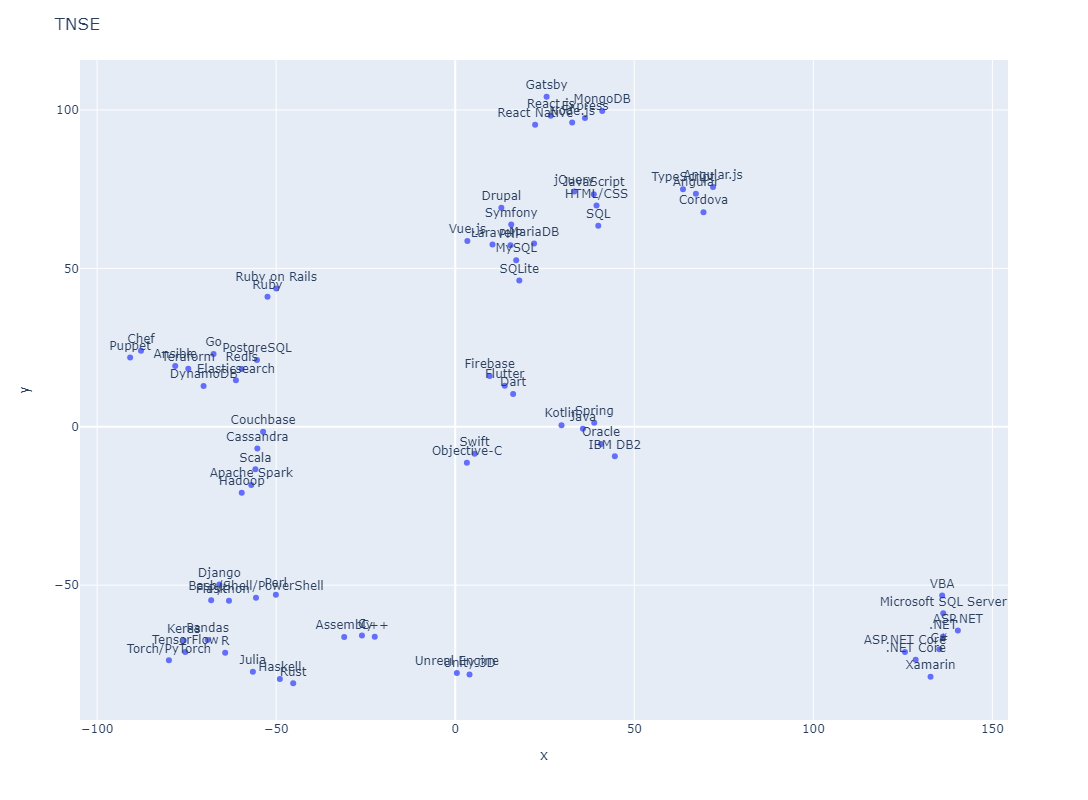

In [27]:
fig = px.scatter(x=tsne_projection[0], y=tsne_projection[1], text=tsne_projection.droplevel(0).index)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='TNSE')
fig.show()